# SpectralFPM Simulation

Neerja Aggarwal

Oct 23rd, 2024

Simulate the measurement & attempt reconstruction for a spectral object. 


In [1]:
import fpm_helper as fpm
import matplotlib.pyplot as plt
import numpy as np
import torch
# plt.style.use('dark_background')

In [2]:
device = fpm.use_gpu(2)

cuda:2


# setup the fpm system

In [3]:
mag = 4 # 4x 
pix_size_camera = 4 #  micron"

# wv_start = 400e-3 # micron
# wv_end = 800e-3 # micron
# wv_step = 50e-3 # micron
# wv_range = np.arange(wv_start,wv_end, wv_step)
# print(wv_range)

wv = 500e-3 # micron
na_obj = 0.05 # low na objective 

fpm_setup = fpm.FPM_setup(mag = mag, pix_size_camera = pix_size_camera, wv = wv, na_obj = na_obj)

Using stock object data


/home/neerja/CODE/SpectralPtychographyProjectGitRepo/fpm_helper.py:104: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1729496767994/work/torch/csrc/utils/tensor_numpy.cpp:204.)
  im = torch.from_numpy(image.imread(path))[:,:,0] # pick out the first channel


# view the obj

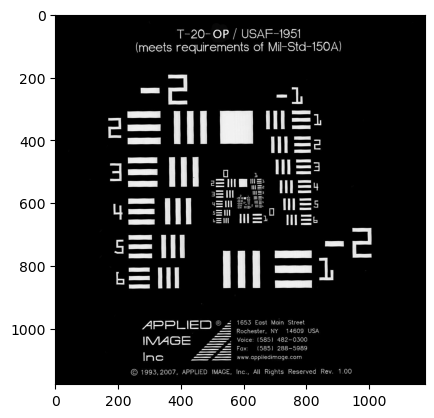

In [4]:
plt.imshow(torch.sum(fpm_setup.objstack, dim =0), cmap = 'gray')

# simulate some measurements

[[ 0.00000000e+00  0.00000000e+00]
 [ 1.09558045e-01  1.30713939e-01]
 [-8.38172683e-03  2.73159542e-01]
 [ 3.06973673e-02  3.85518407e-01]
 [ 4.32571579e-01  2.58536318e-02]
 [-3.45097338e-01 -3.68136669e-01]
 [-6.21530865e-01 -1.81998927e-01]
 [ 3.46149365e-01 -5.67345077e-01]
 [-6.86679124e-01  1.43801271e-01]
 [-7.14099245e-01  1.19201478e-01]
 [-6.94091647e-01 -2.90648848e-01]
 [ 1.37161525e-01 -9.25783412e-01]
 [ 8.97402422e-02  9.61243155e-01]
 [ 8.34792710e-01 -5.30977475e-01]
 [-1.02694742e+00 -1.12540704e-01]
 [-9.78455254e-01 -4.62516953e-01]
 [ 7.12161926e-01  9.82516527e-01]
 [-1.30338898e+00 -3.80664419e-01]
 [-2.13792093e-01 -1.37411348e+00]
 [ 2.06863830e-01  1.46239782e+00]
 [-1.28889034e+00  8.09248812e-01]
 [-5.80682003e-02  1.55763048e+00]
 [ 3.63985868e-01  1.55448804e+00]
 [-2.03195852e-01 -1.59785693e+00]
 [-5.11516710e-01  1.54892467e+00]
 [-2.53798531e-01 -1.62181591e+00]
 [-1.43195571e+00 -8.78994224e-01]
 [ 1.68784556e+00 -1.36622927e-01]
 [ 1.70330188e+00 -2

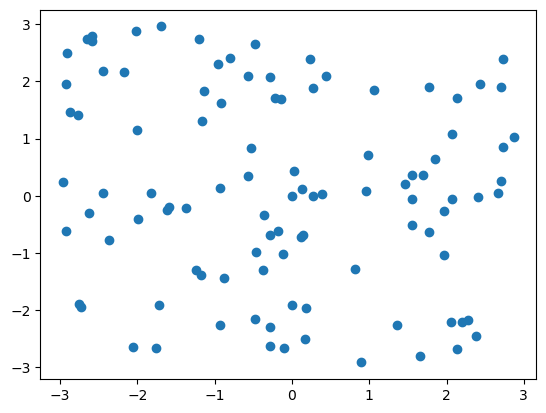

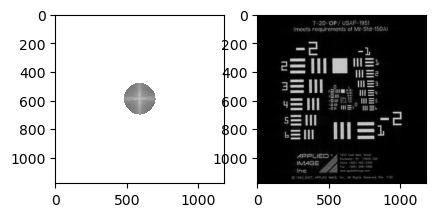

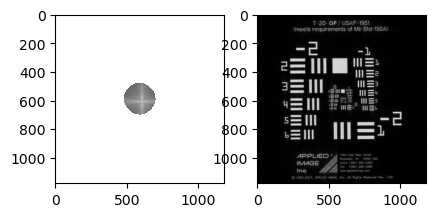

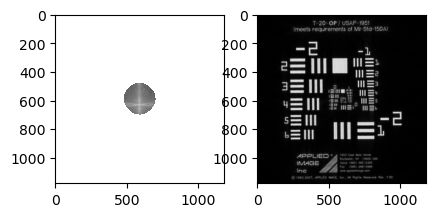

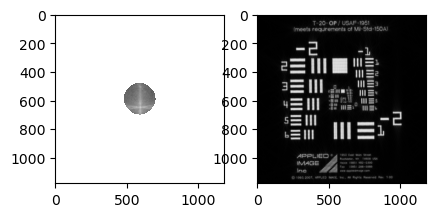

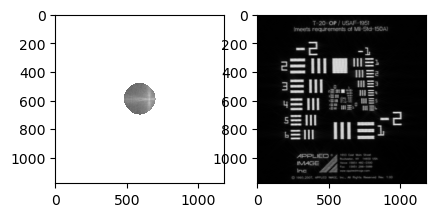

In [5]:
d = 75
led_spacing = 5
num_leds = 100
list_leds = fpm.createlist_led(num_leds,-3,3) 
print(list_leds)
plt.scatter(list_leds[:,1],list_leds[:,0])
(measstack, list_leds) = fpm.createRandomAngleMeasStack(fpm_setup, list_leds, d=d, led_spacing=led_spacing)

# Recon

In [6]:
recon = fpm.Reconstruction(fpm_setup, measstack, list_leds, led_spacing=led_spacing, dist=d, device = 2)

cuda:2


In [7]:
recon.initRecon()
recon.parameters(step_size=1e-3, num_iters=200)

KeyboardInterrupt: 

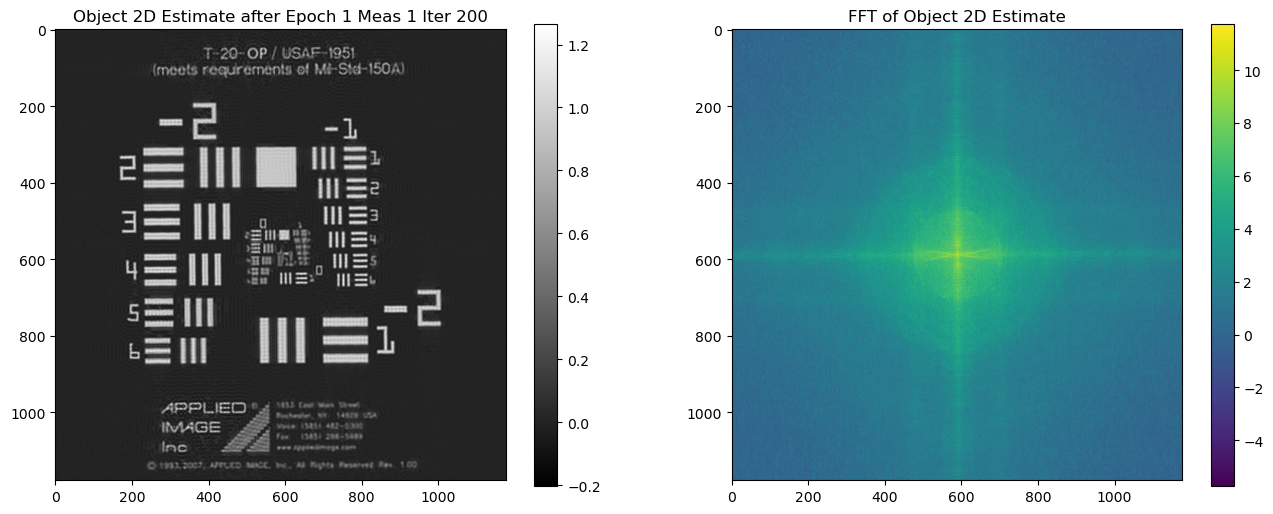

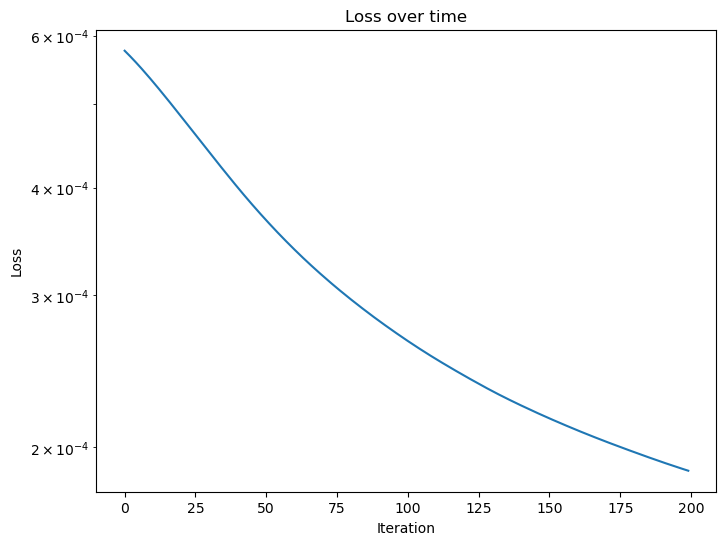

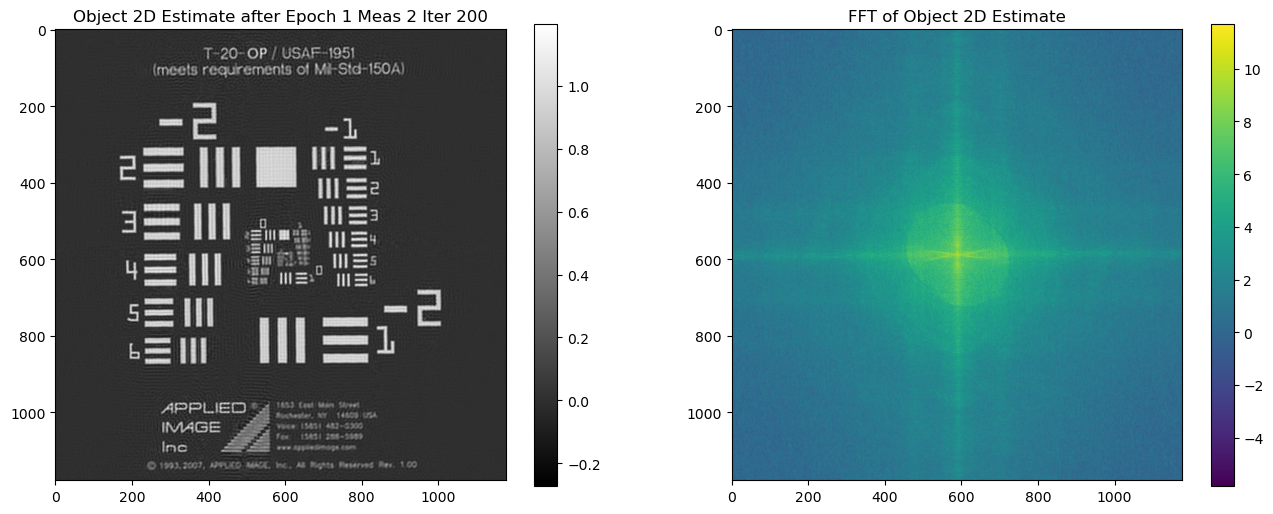

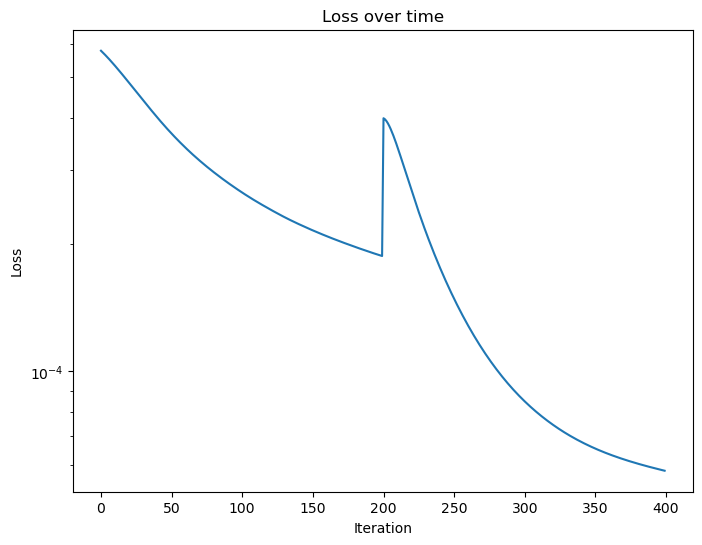

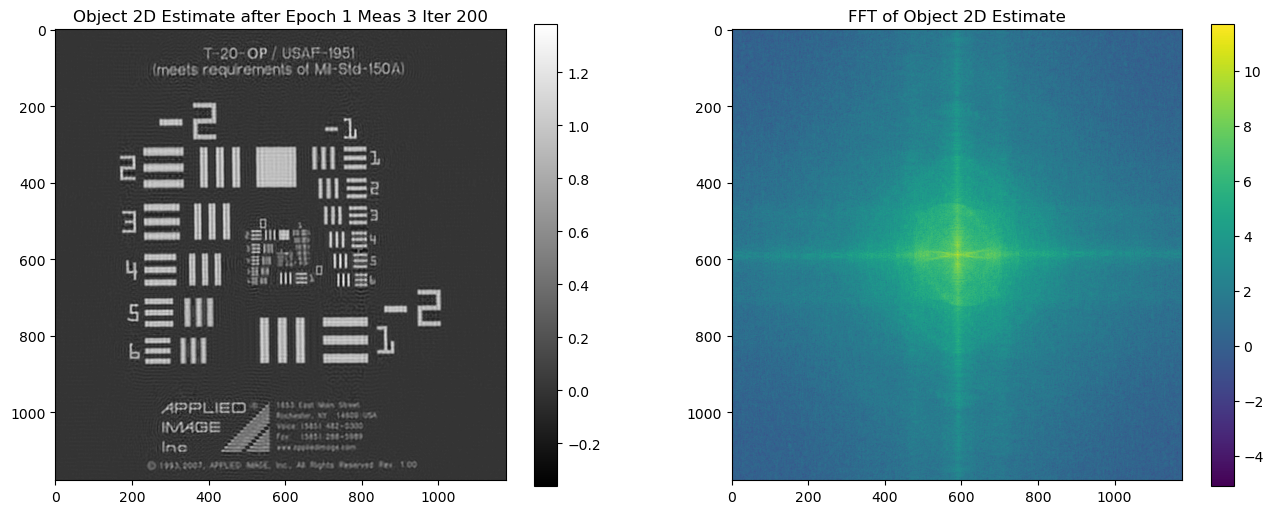

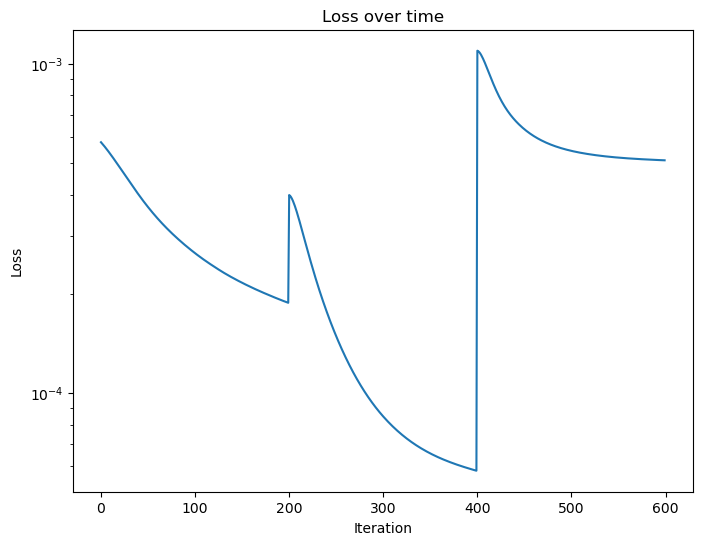

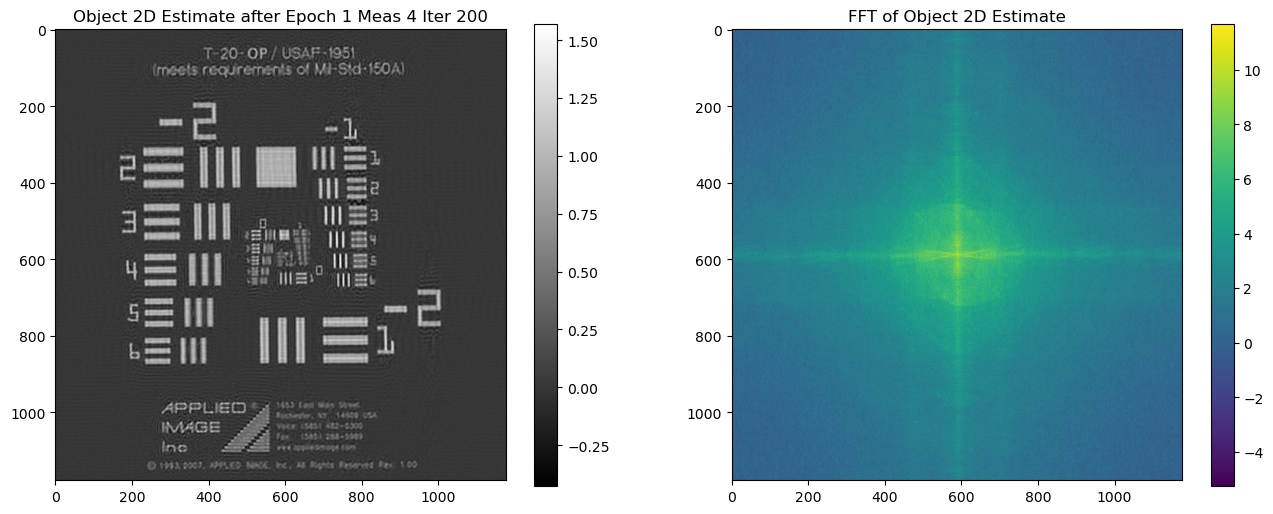

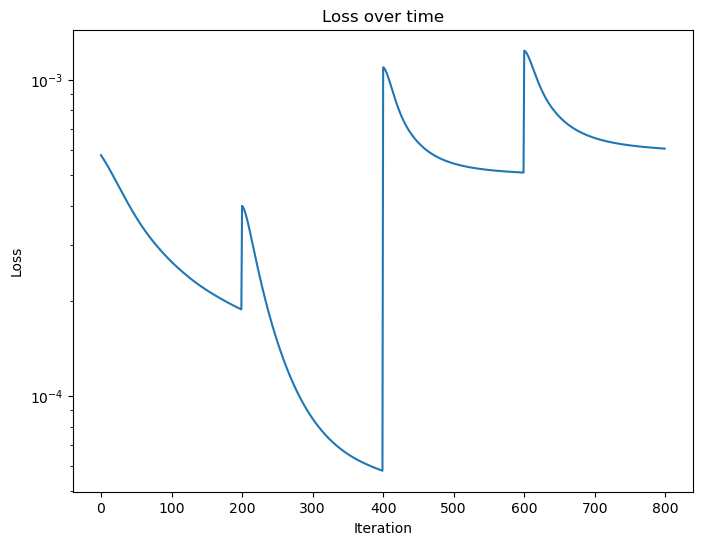

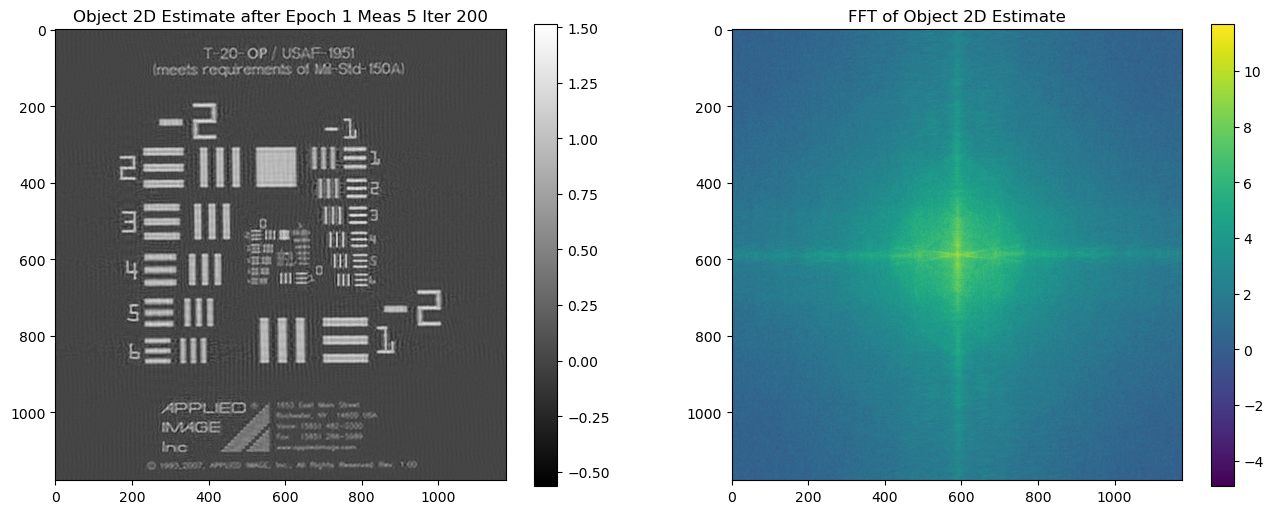

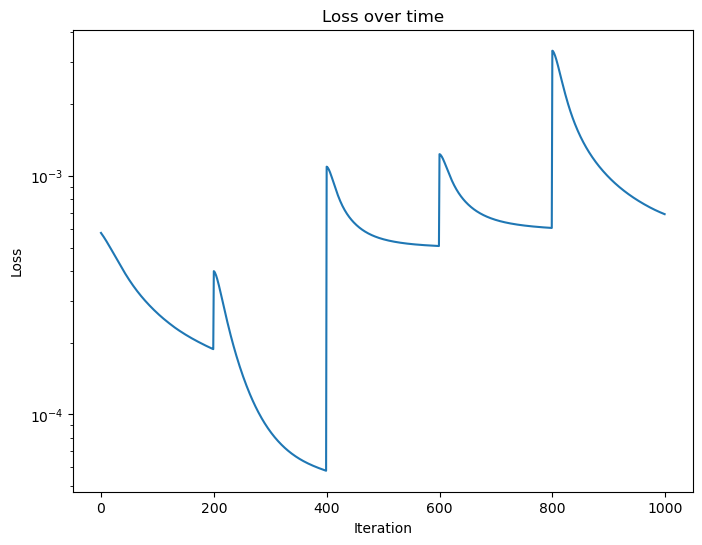

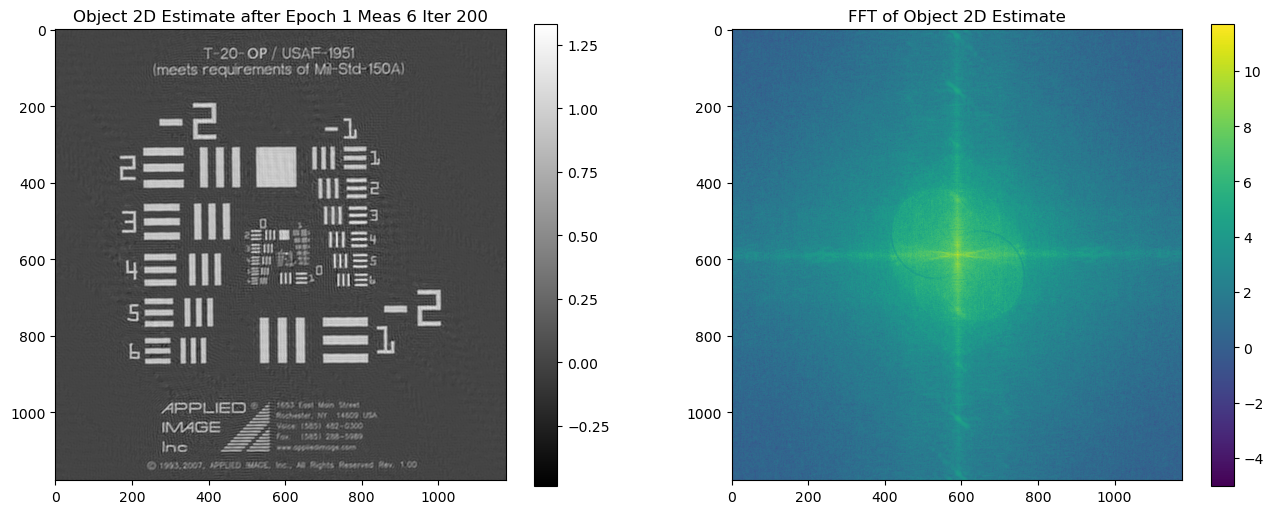

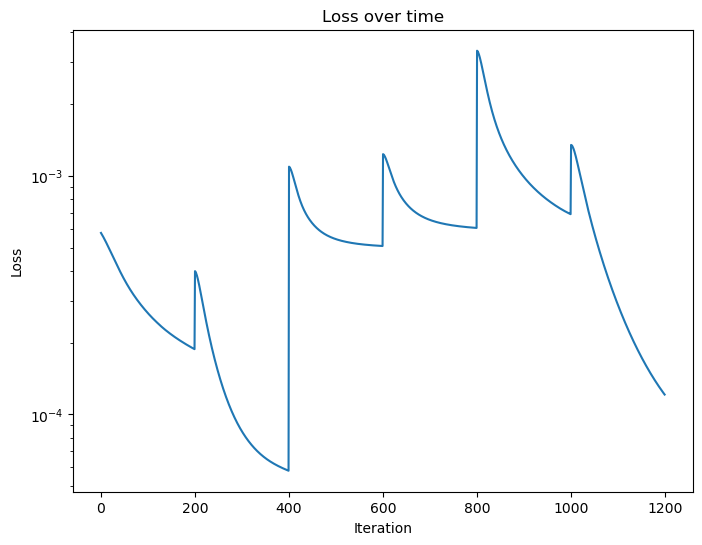

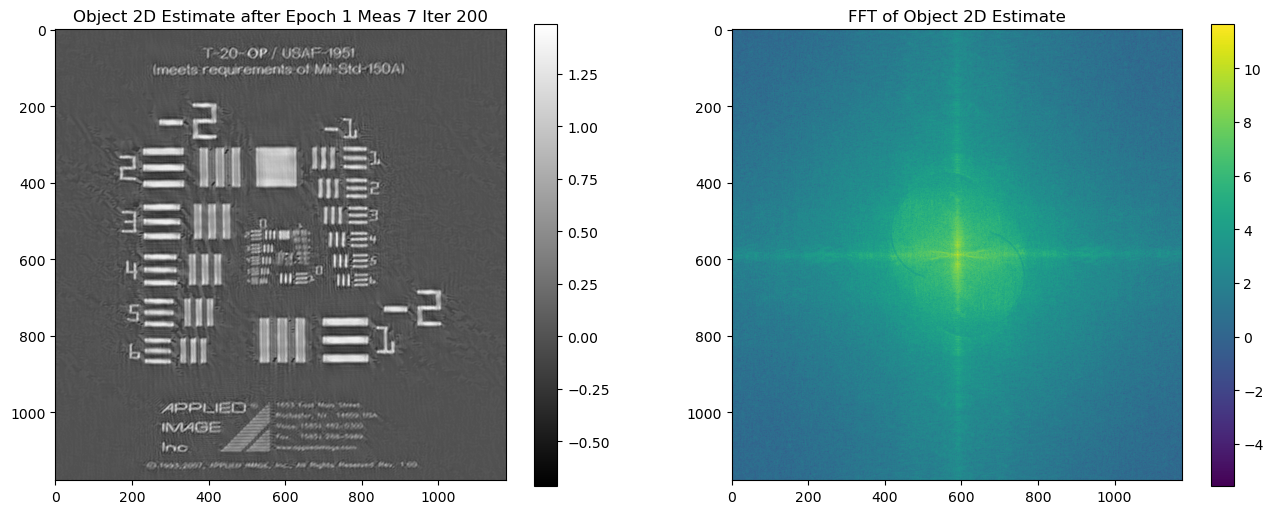

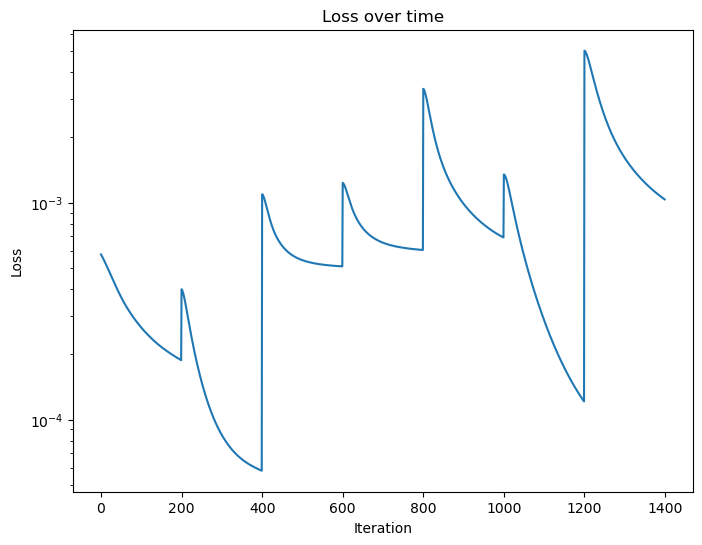

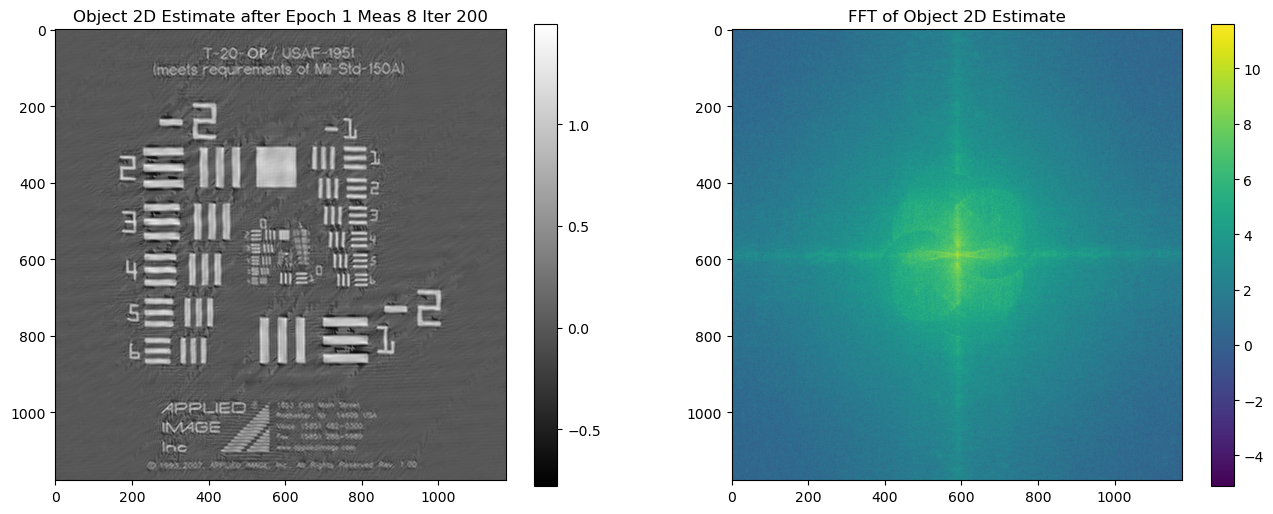

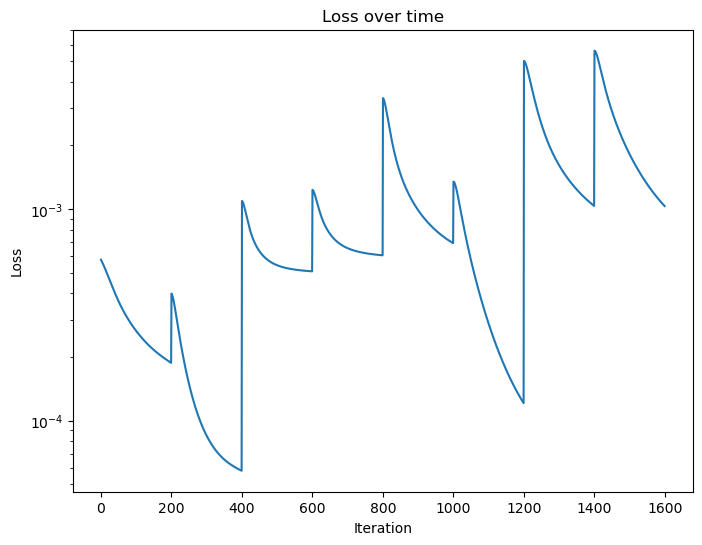

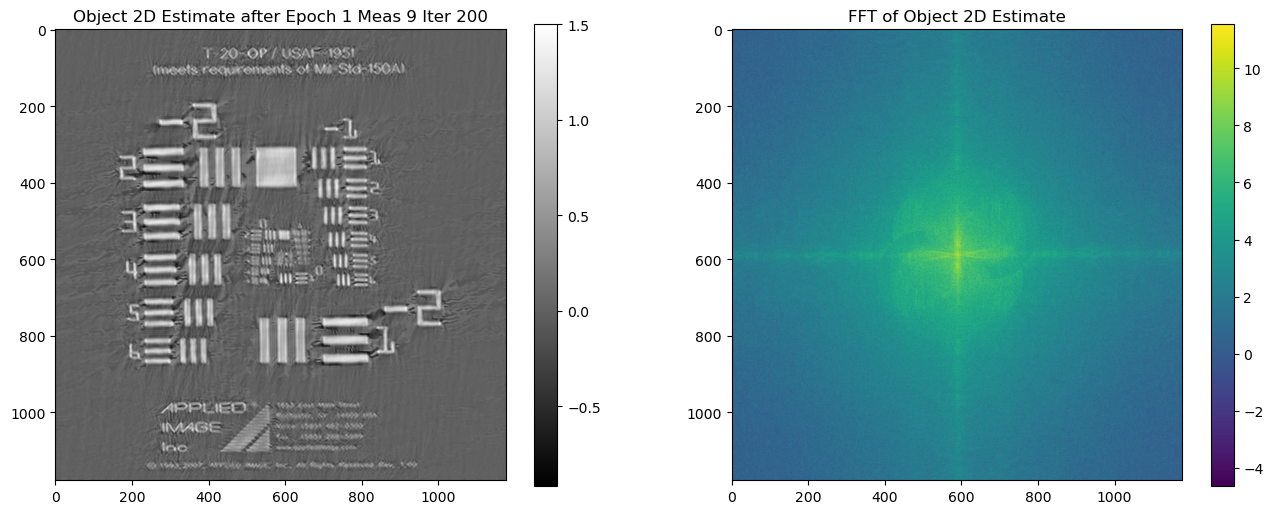

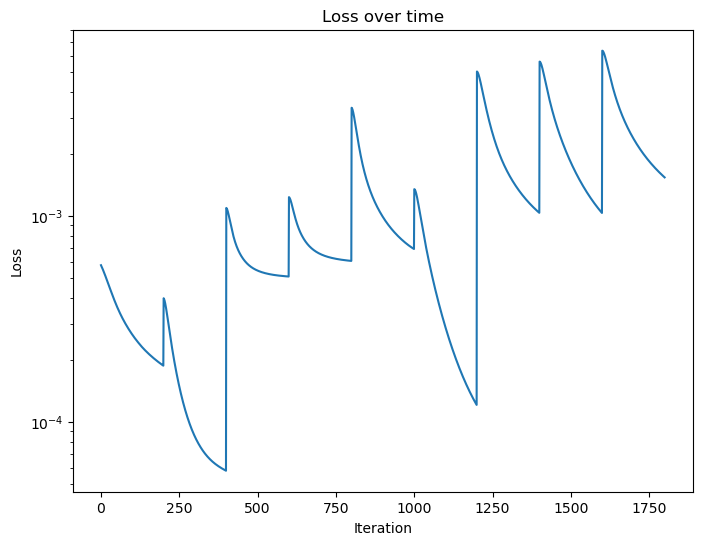

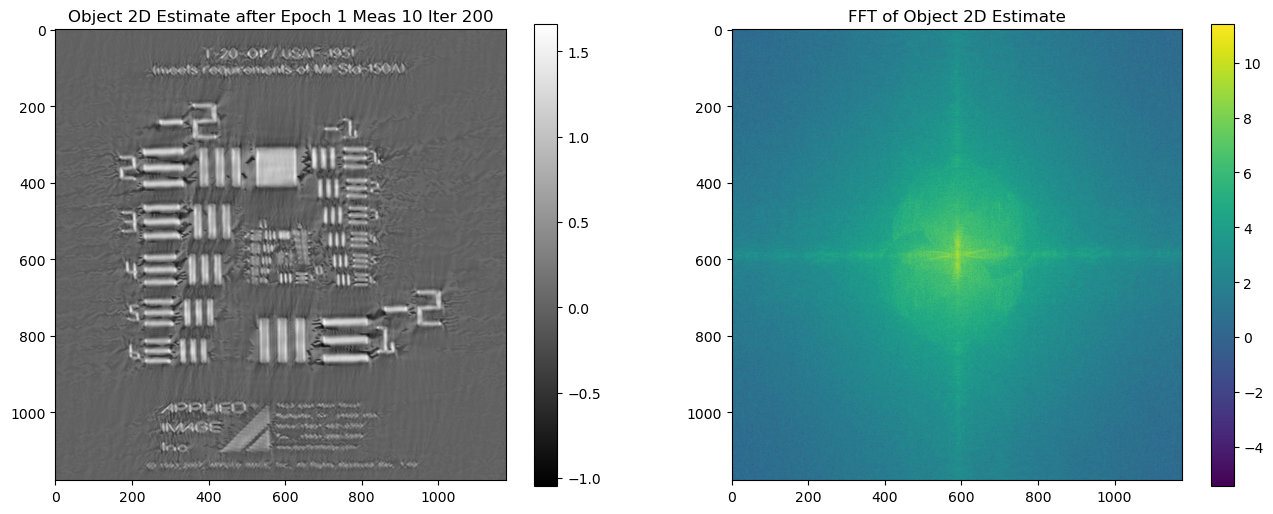

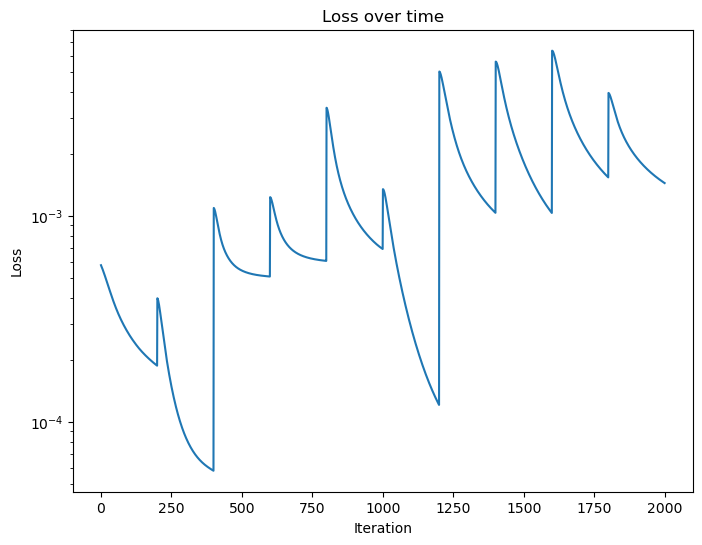

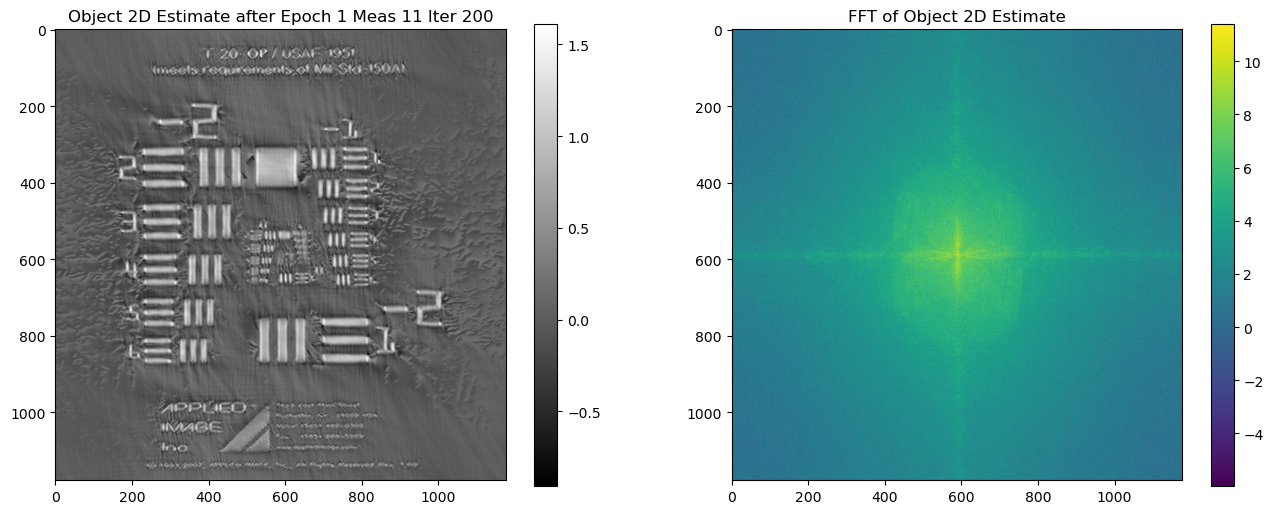

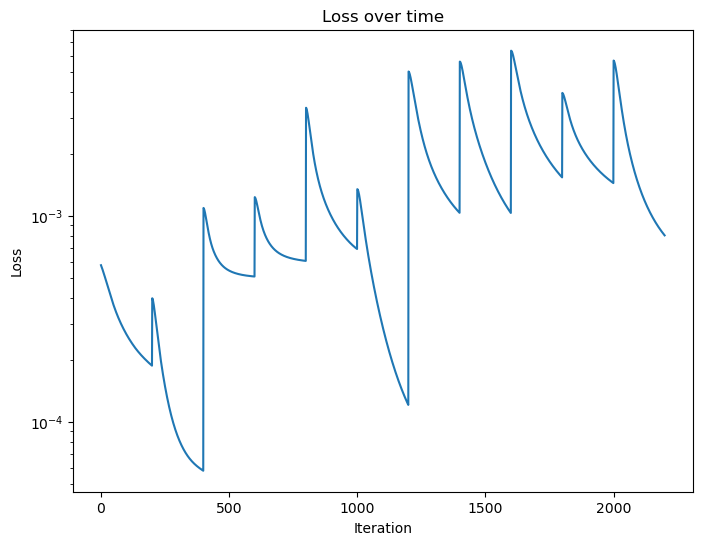

In [ ]:
recon.train()

In [49]:
obj_est = recon.obj_est.detach().cpu().numpy()

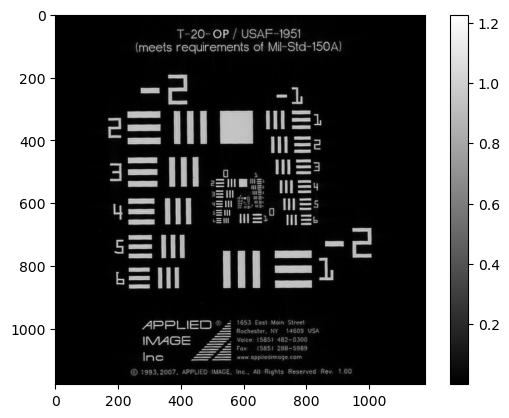

In [50]:
plt.imshow(np.abs(np.sum(obj_est, axis = 0)), cmap = 'gray')
plt.colorbar()

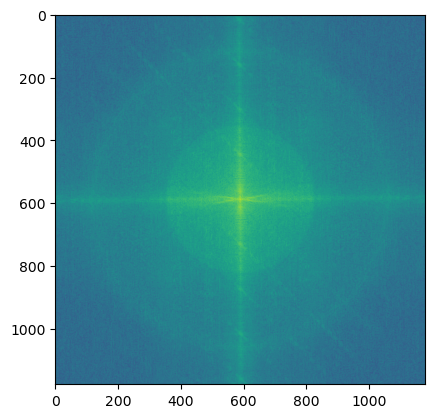

In [53]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(np.squeeze(obj_est))))))

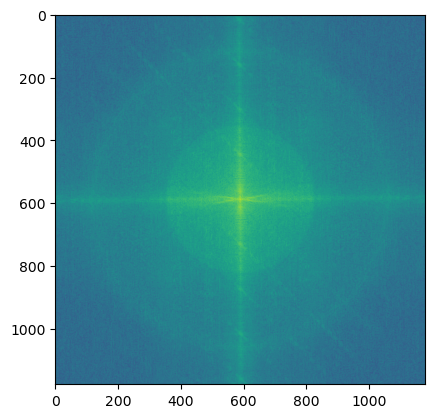

In [54]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(np.squeeze(recon.measstack[0].cpu().numpy()))))))